<a href="https://colab.research.google.com/github/emc-vb/EEG-study/blob/main/VR_EEG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#**Effects of auditory priming on the perception of semantic and syntactic inconsistencies in a virtual environment**

25/09/2022

Group 8: Luna Döring, Johannes Weisen, Nele Werner & Eva-Marie von Butler


In this Notebook, we will analyse the results from our project for the course "Designing and conducting an EEG study in VR" held at the Department of Cognitive Science, University of Osnabrück.




In [64]:
#loading datasets
d1 = pd.read_csv('data1.csv')
d2 = pd.read_csv('data2.csv')
d3 = pd.read_csv('data3.csv')
d4 = pd.read_csv('data4.csv')
d5 = pd.read_csv('data5.csv')
d6 = pd.read_csv('data6.csv')
d7 = pd.read_csv('data7.csv')
d8 = pd.read_csv('data8.csv')
d9 = pd.read_csv('data9.csv')
d10 = pd.read_csv('data10.csv')

d1['id'] = 1
d2['id'] = 2
d3['id'] = 3
d4['id'] = 4
d5['id'] = 5
d6['id'] = 6
d7['id'] = 7
d8['id'] = 8
d9['id'] = 9
d10['id'] =10

#combining into one frame
df = pd.concat([d1,d2,d3,d4,d5,d6,d7,d8,d9,d10])
print(len(df.index))

#remove spaces in column names
df = df.rename(columns = {' ReactionTime': 'ReactionTime', ' Rating': 'Rating', ' Response': 'Response'}, inplace = False)

#extract object from stimulus name
df['Object']=df['Stimulus'].str[:-3]

#extract condition from stimulus name
df['Condition']=df['Stimulus'].str[-2:]

#condition into visual & auditory
df['Visual'] = df['Condition'].str[0].map({'I': 'Incongruent', 'C': 'Congruent'})
df['Auditive'] = df['Condition'].str[1].map({'I': 'Incongruent', 'C': 'Congruent'})

#get response accuracy
df['Correctness'] = df['Response'] == df['Object']

df = df[(df['ReactionTime'] <= 4000)& (df['ReactionTime'] != 0)]

#change units
df['ReactionTime']= df['ReactionTime']/1000
df.Rating = df.Rating.astype(int)
print(len(df.index))


df

80
74


,Stimulus,ReactionTime,Response,Rating,id,Object,Condition,Visual,Auditive,Correctness
2,Tree IC,2.670,Tree,2,1,Tree,IC,Incongruent,Congruent,True
3,House IC,2.339,House,2,1,House,IC,Incongruent,Congruent,True
4,Tree II,2.428,Tree,1,1,Tree,II,Incongruent,Incongruent,True
5,Tree CC,2.697,Tree,5,1,Tree,CC,Congruent,Congruent,True
6,House CI,1.812,House,1,1,House,CI,Congruent,Incongruent,True
...,...,...,...,...,...,...,...,...,...,...
2,House CC,1.970,House,5,10,House,CC,Congruent,Congruent,True
3,House II,1.689,House,1,10,House,II,Incongruent,Incongruent,True
5,House CI,1.604,House,2,10,House,CI,Congruent,Incongruent,True
6,Tree CC,1.996,Tree,5,10,Tree,CC,Congruent,Congruent,True


In [65]:
df_house = df[df['Object'] =='House']
df_tree = df[df['Object'] =='Tree']

#get mean reaction time per condition
mean_rt_condition = df.groupby(['Condition'], as_index = False)['ReactionTime'].mean()

#get mean reaction time per condition for house
mean_rt_condition_house = df_house.groupby(['Object', 'Condition'],as_index = False)['ReactionTime'].mean()
mean_rt_condition_tree = df_tree.groupby(['Object', 'Condition'],as_index = False)['ReactionTime'].mean()

#get mean reaction time for each object
mean_rt_object = df.groupby(['Object'],as_index = False)['ReactionTime'].mean()


#**Plotting the Data**



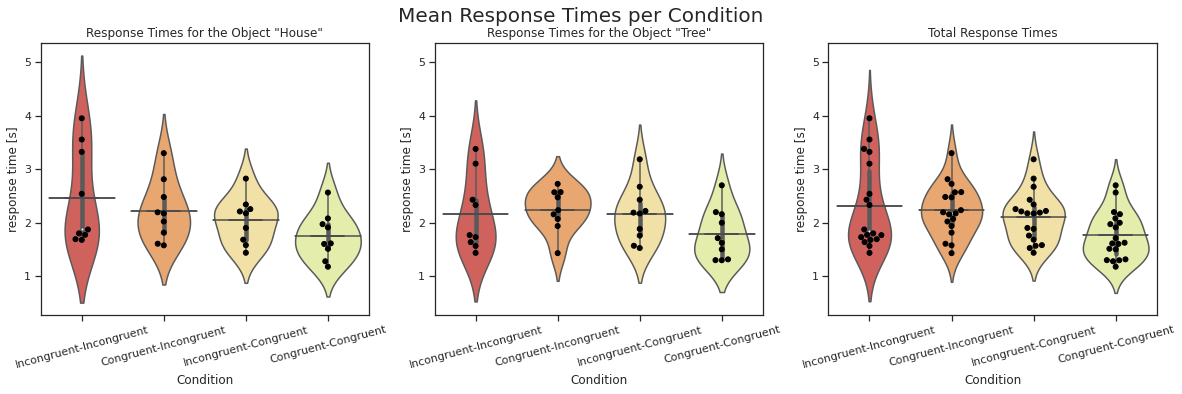

In [66]:
#order by Reactiontime
box_order = df.groupby("Condition")["ReactionTime"].sum().sort_values(ascending=False).index.values

#plot seperately house & tree and then both together
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5), sharey = True)
fig.suptitle('Mean Response Times per Condition', fontsize=20)

axes[0]= sns.violinplot(x='Condition', y='ReactionTime', data=df_house, ax = axes[0], order = box_order)
axes[0]= sns.boxplot(x='Condition', y='ReactionTime', data=mean_rt_condition_house, ax = axes[0], order = box_order, color = "red")
axes[0]= sns.swarmplot(x='Condition', y='ReactionTime', linewidth=1, color='black', data=df_house, ax = axes[0], order = box_order)
axes[0].set(title = 'Response Times for the Object "House"', ylabel='response time [s]')
axes[0].set_xticklabels(['Incongruent-Incongruent','Congruent-Incongruent','Incongruent-Congruent','Congruent-Congruent'])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=15)
axes[0].yaxis.set_tick_params(labelbottom=True)

axes[1]= sns.violinplot(x='Condition', y='ReactionTime', data=df_tree, ax = axes[1], order = box_order)
axes[1]= sns.boxplot(x='Condition', y='ReactionTime',data=mean_rt_condition_tree, ax = axes[1], order = box_order, color = "red")
axes[1]= sns.swarmplot(x='Condition', y='ReactionTime',linewidth=1, color='black', data=df_tree, ax = axes[1], order = box_order)
axes[1].set(title = 'Response Times for the Object "Tree"', ylabel='response time [s]')
axes[1].set_xticklabels(['Incongruent-Incongruent','Congruent-Incongruent','Incongruent-Congruent','Congruent-Congruent'])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=15)
axes[1].yaxis.set_tick_params(labelbottom=True)

axes[2]= sns.violinplot(x='Condition', y='ReactionTime', data=df, ax = axes[2], order = box_order)
axes[2]= sns.boxplot(x='Condition', y='ReactionTime', data=mean_rt_condition, ax = axes[2], order = box_order, color = "red")
axes[2]= sns.swarmplot(x='Condition', y='ReactionTime', linewidth=1, color='black', data=df, ax = axes[2], order = box_order)
axes[2].set(title = 'Total Response Times',ylabel='response time [s]')
axes[2].set_xticklabels(['Incongruent-Incongruent','Congruent-Incongruent','Incongruent-Congruent','Congruent-Congruent'])
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=15)
axes[2].yaxis.set_tick_params(labelbottom=True)

plt.show()

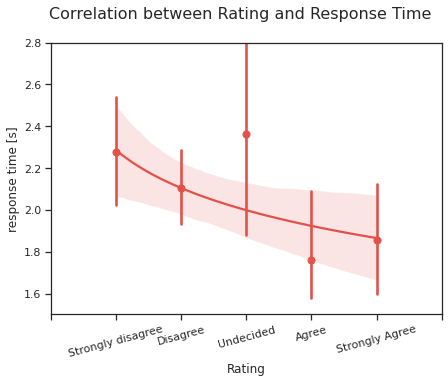

In [67]:
# Was the response time correlated with the unexpectedness?

fig, ax= plt.subplots(nrows=1, ncols=1, figsize=(7,5))
fig.suptitle('Correlation between Rating and Response Time', fontsize=16)

#ax = sns.pointplot(x="Rating", y="ReactionTime", hue = "Object", data=df)
ax = sns.regplot(x="Rating", y="ReactionTime", data=df, x_estimator=np.mean, logx=True)
ax.set(ylabel='response time [s]', ylim = (1.5,2.8), xlim =(0,6) )
ax.set_xticklabels(['','Strongly disagree','Disagree','Undecided','Agree','Strongly Agree'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=15)

plt.show()


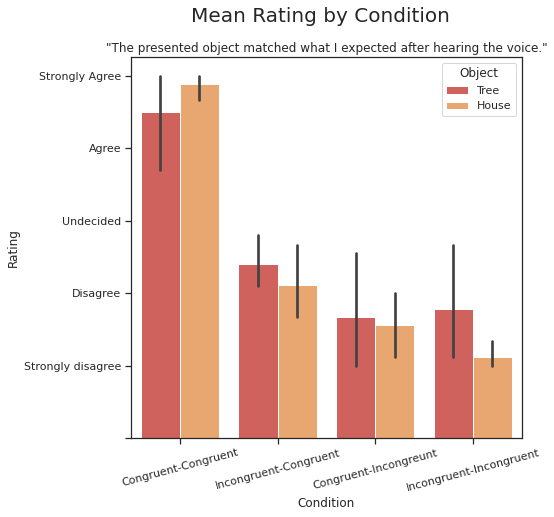

In [68]:
# Was the Rating correlated to the condition?

fig, ax= plt.subplots(nrows=1, ncols=1, figsize=(7,7))
fig.suptitle('Mean Rating by Condition', fontsize=20)
sns.set(palette='Spectral', style='ticks')
ax = sns.barplot(data=df, x="Condition", y="Rating", hue = "Object", order = df.groupby("Condition")["Rating"].sum().sort_values(ascending=False).index.values)
ax.set(title='"The presented object matched what I expected after hearing the voice."')
ax.set_yticklabels(['','Strongly disagree','Disagree','Undecided','Agree','Strongly Agree'])
ax.set_xticklabels(['Congruent-Congruent','Incongruent-Congruent','Congruent-Incongreunt','Incongruent-Incongruent'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=15)

plt.show()



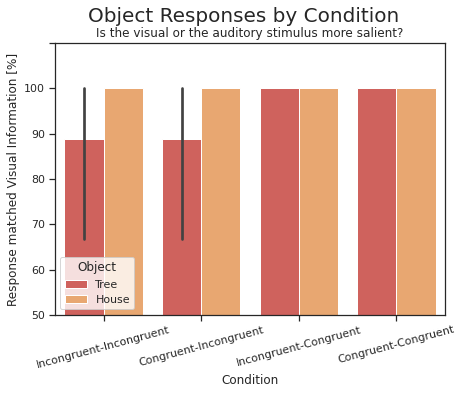

In [69]:
# Is the visual info or the auditory more salient?
fig, ax= plt.subplots(nrows=1, ncols=1, figsize=(7,5))
fig.suptitle('Object Responses by Condition', fontsize=20)

ax = sns.barplot(data=df, x="Condition", y="Correctness", hue="Object", order = box_order)
ax.set(ylim=(0.5,1.1))
ax.set(title='Is the visual or the auditory stimulus more salient?', ylabel = 'Response matched Visual Information [%]')
ticks = [50,60,70, 80,90,100]
ax.set_yticklabels(ticks)
ax.set_xticklabels(['Incongruent-Incongruent','Congruent-Incongruent','Incongruent-Congruent','Congruent-Congruent'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=15)


plt.show()